This notebook contains the loading of the initial data and running of the resampling function (found in the functions folder)

Following that, some initial data exploration is conducted, before any machine learning models were implemented.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, cohen_kappa_score, precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.utils import resample

import sys
sys.path.append('../functions')  # Add the 'functions' directory to the Python path

from load_and_resample import resample_and_save

In [5]:
heart_data = "../data/raw/heart_disease_health_indicators_BRFSS2015.csv"

resampled_df = resample_and_save(heart_data)

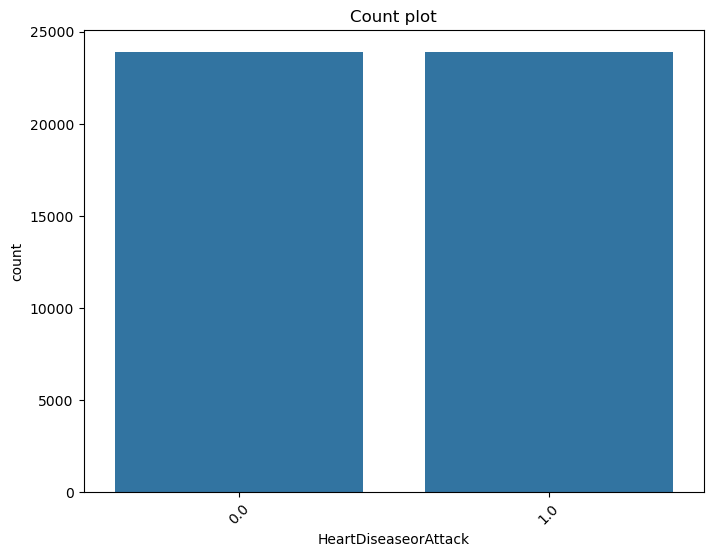

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_df, x='HeartDiseaseorAttack')
plt.title(f'Count plot')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

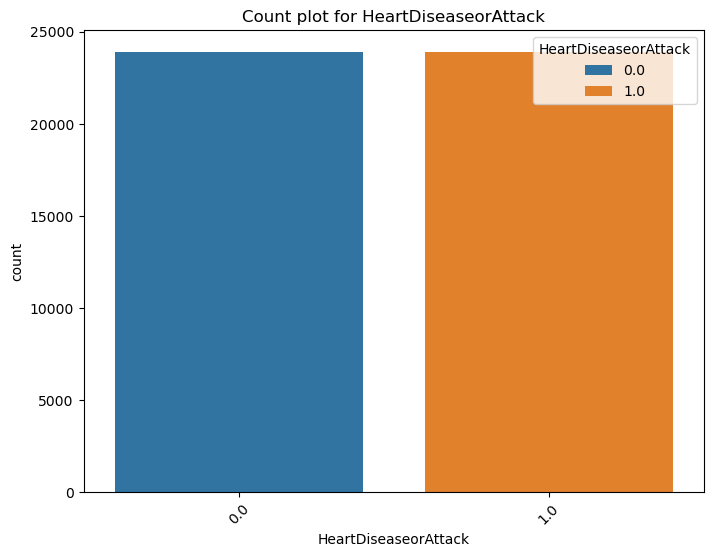

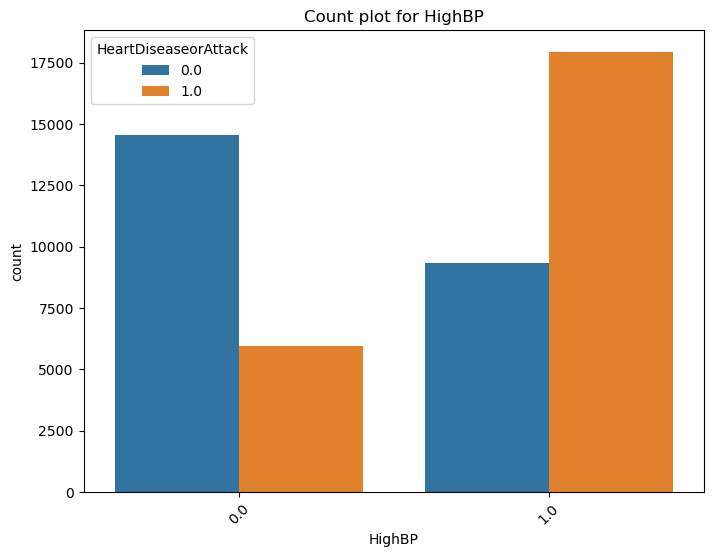

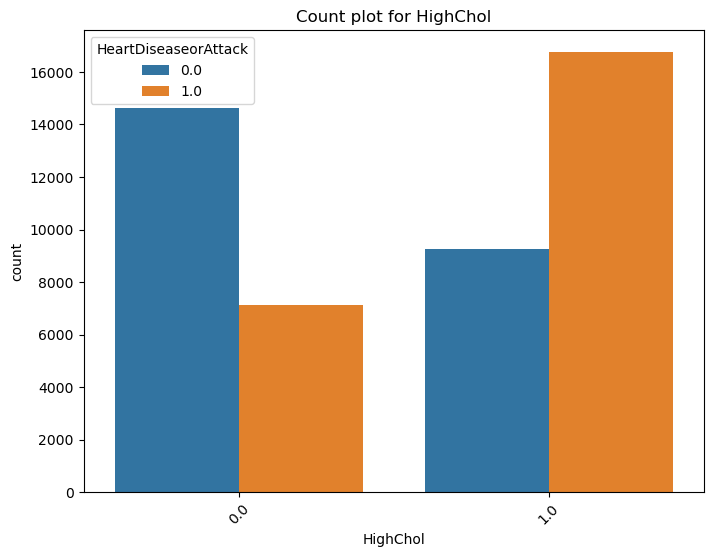

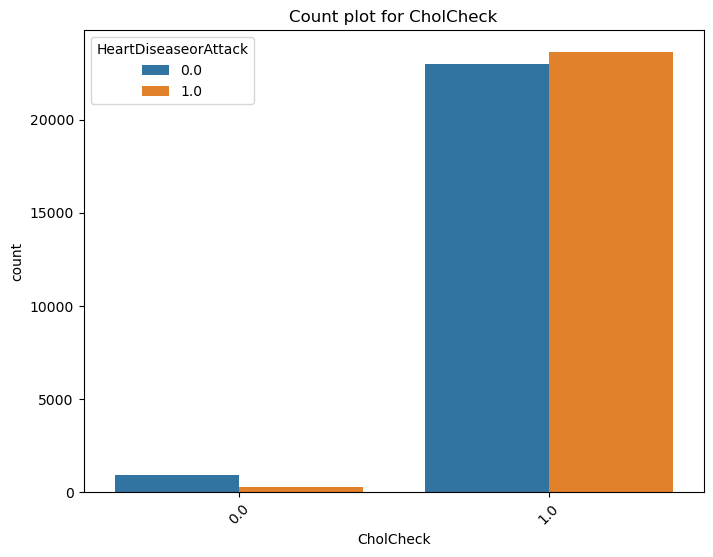

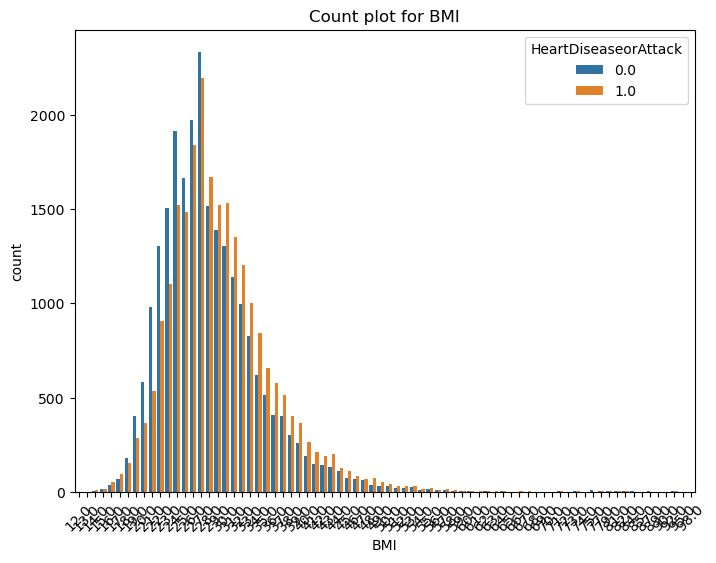

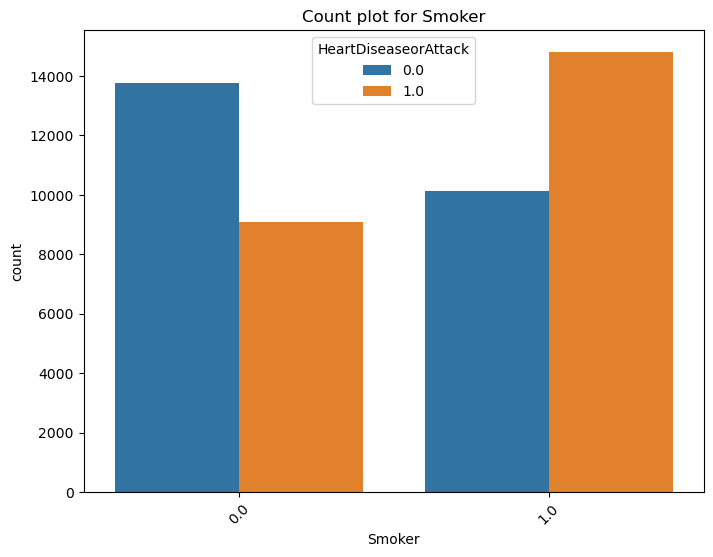

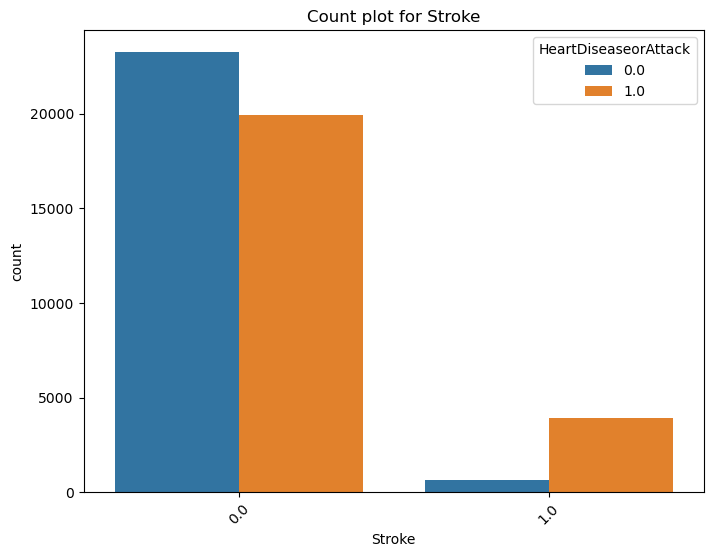

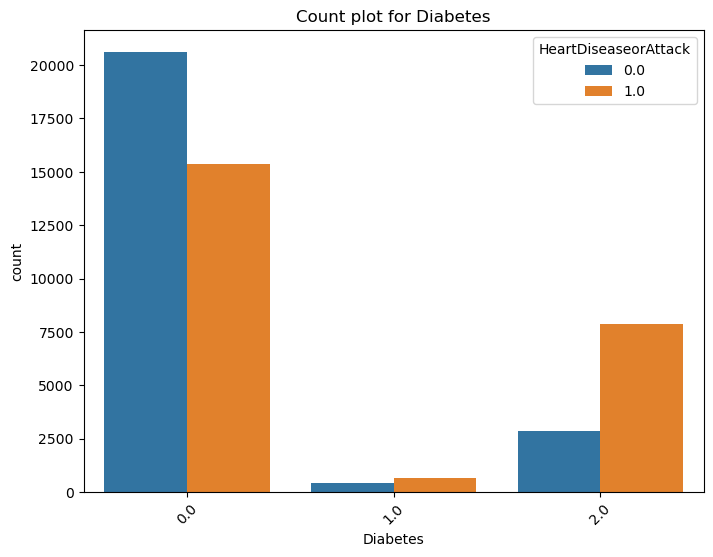

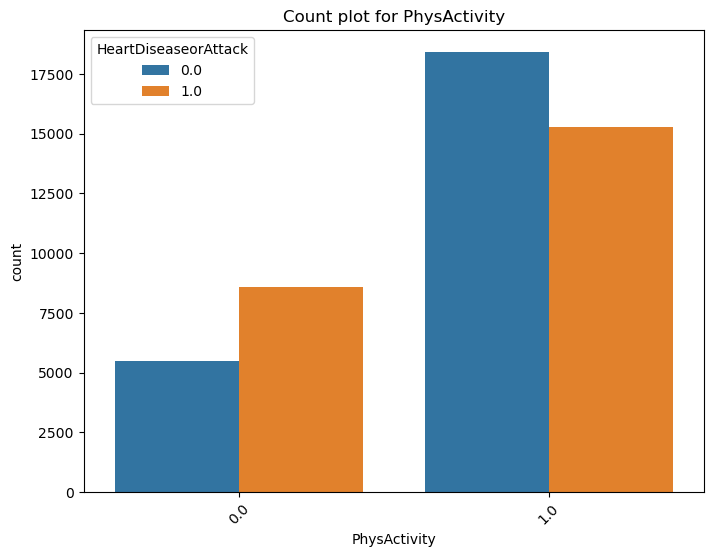

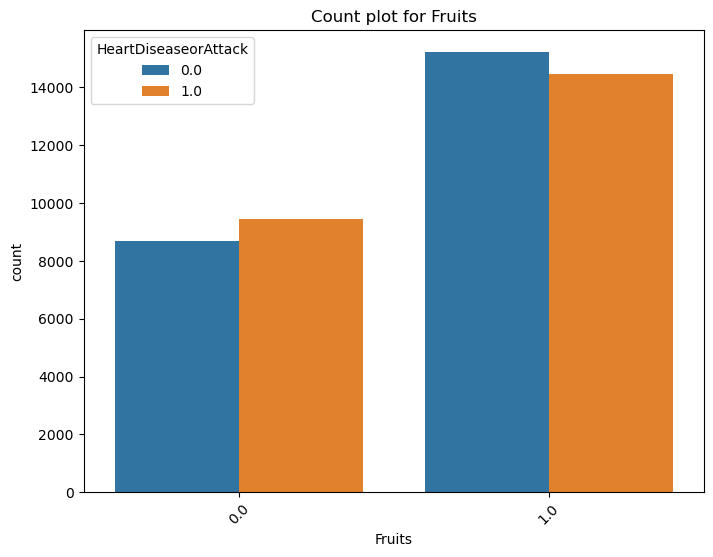

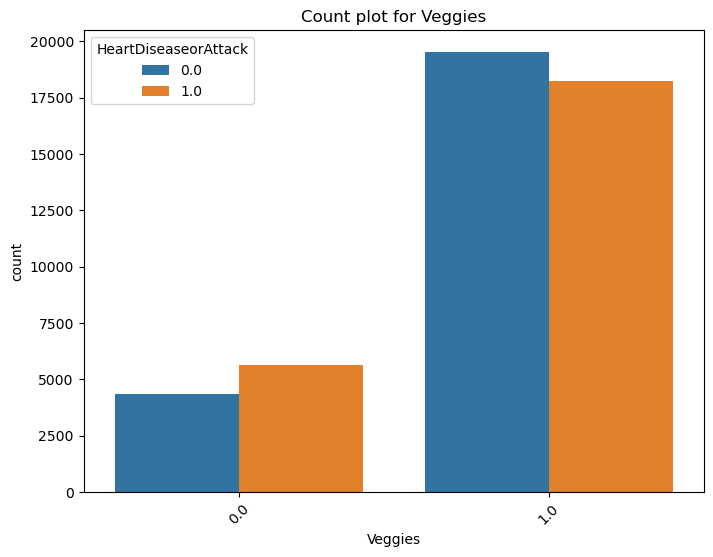

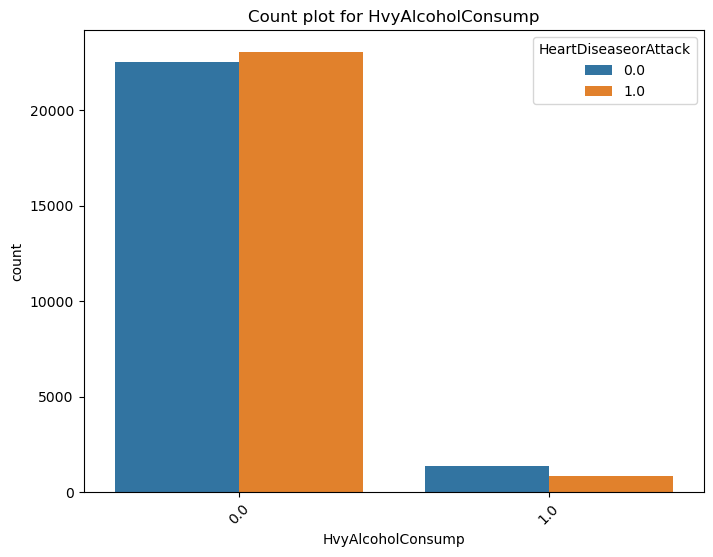

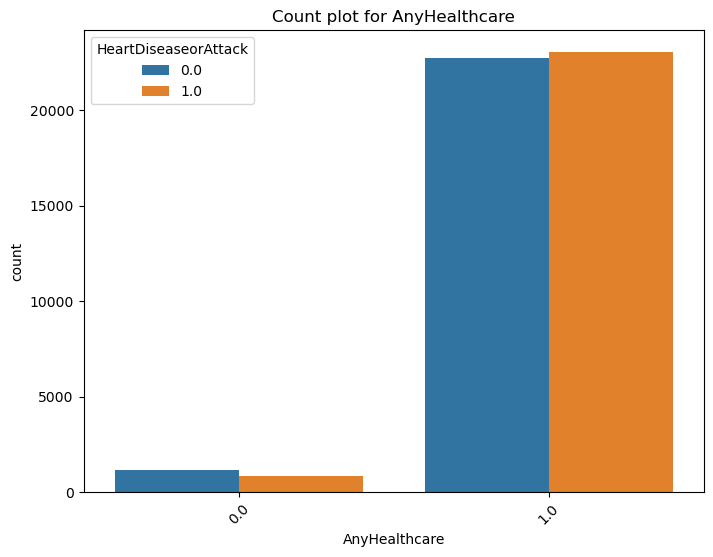

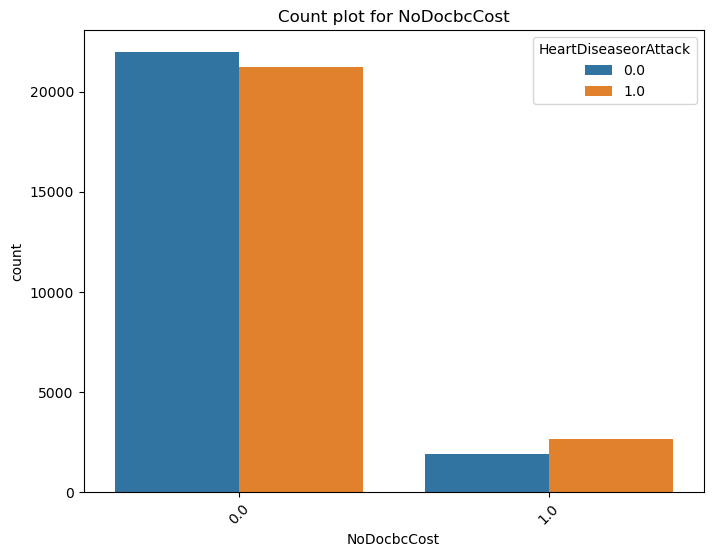

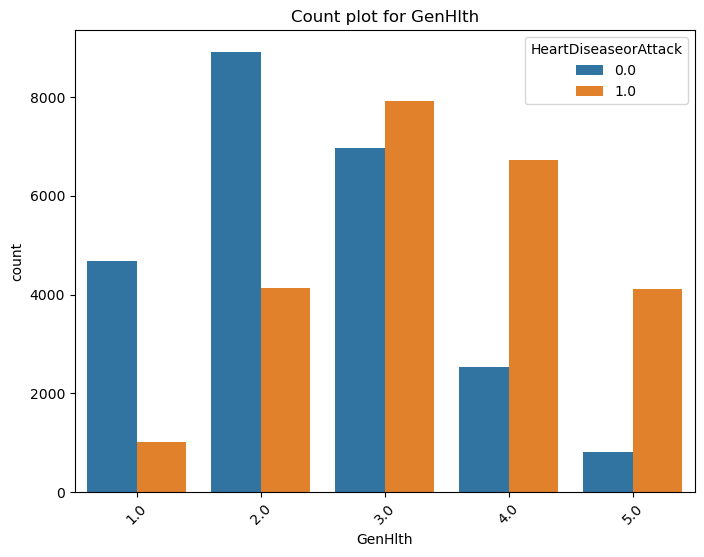

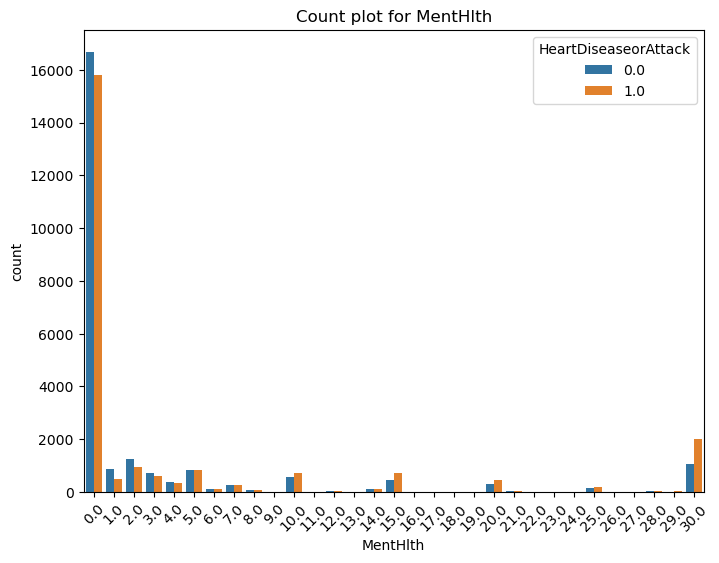

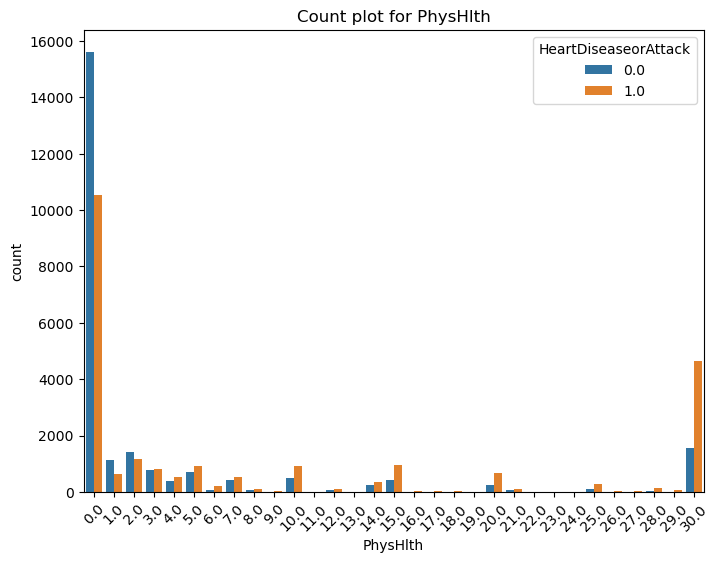

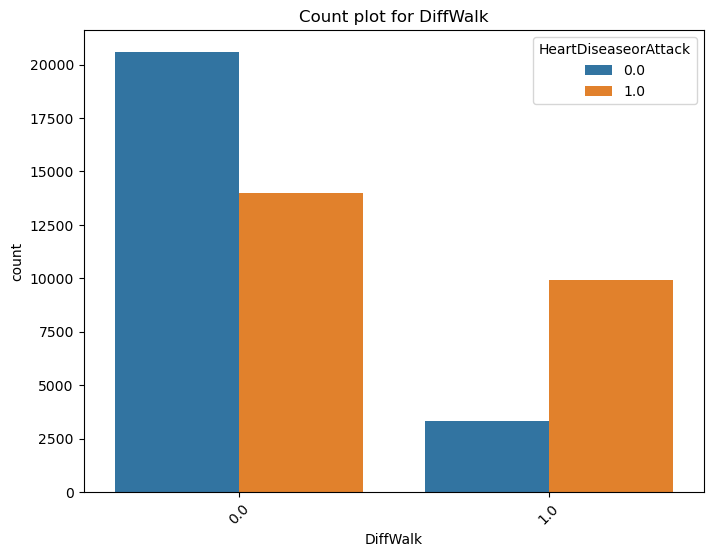

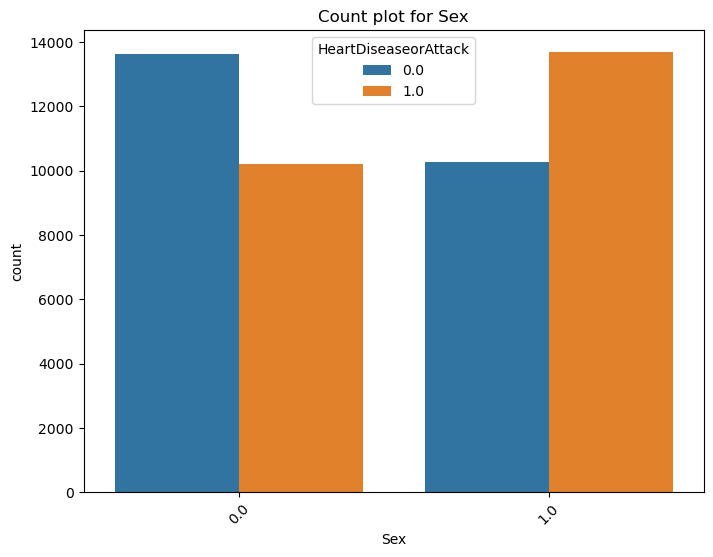

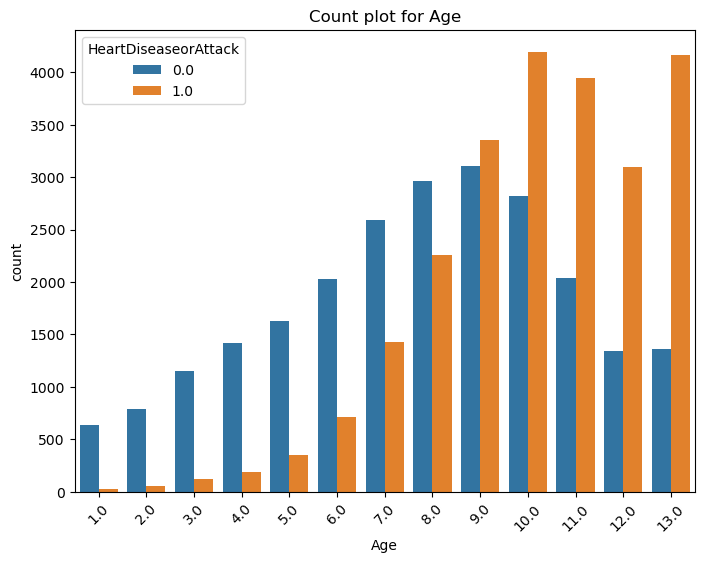

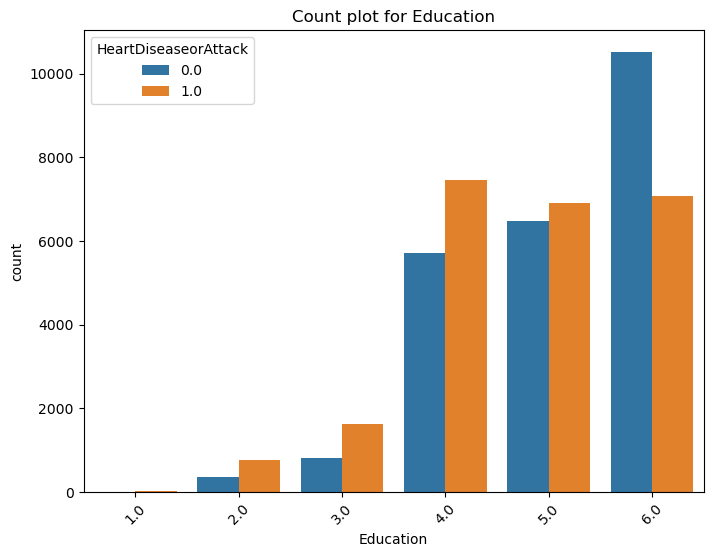

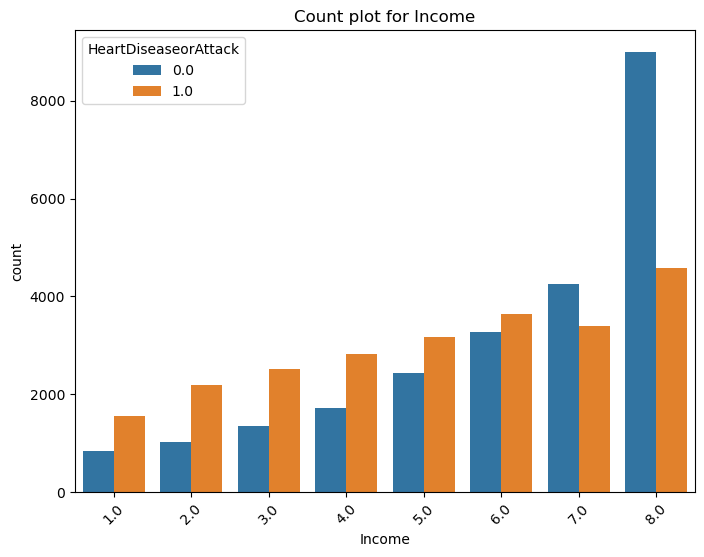

In [7]:
for col in resampled_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=resampled_df, x=col, hue='HeartDiseaseorAttack')
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

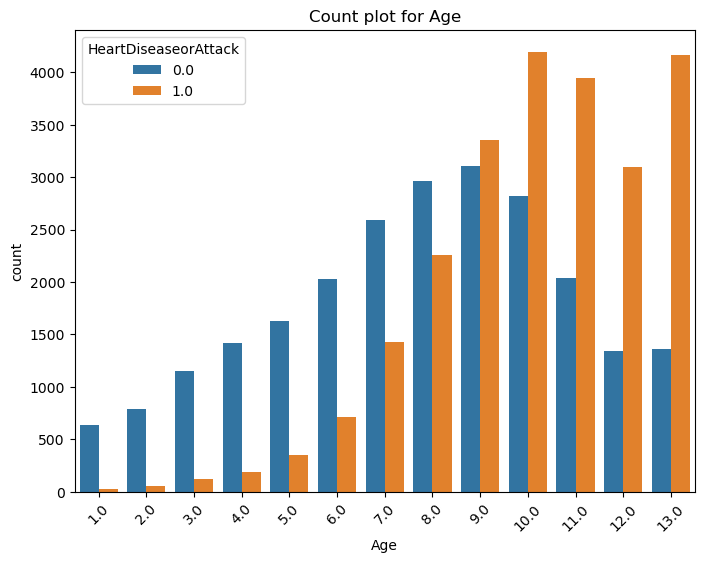

In [19]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=resampled_df, x='Age', hue='HeartDiseaseorAttack')
plt.title(f'Count plot for Age')

age_groups = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+']

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.savefig('../figures/age_countplot.png')
plt.show()

In [27]:
pivot_table = pd.pivot_table(resampled_df, 
                             index='Age', 
                             columns='HeartDiseaseorAttack', 
                             aggfunc='size',  
                             fill_value=0) 

pivot_table

HeartDiseaseorAttack,0.0,1.0
Age,,
1.0,634,29
2.0,794,54
3.0,1154,126
4.0,1423,193
5.0,1631,351
6.0,2025,712
7.0,2591,1425
8.0,2966,2253
9.0,3105,3358


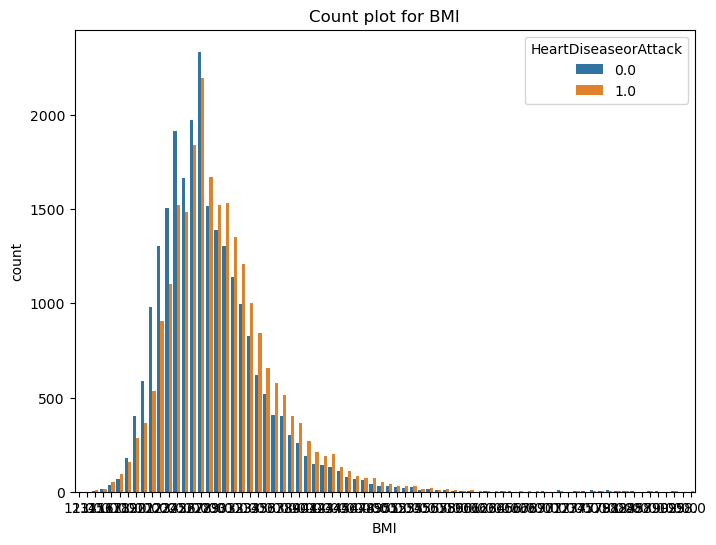

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_df, x='BMI', hue='HeartDiseaseorAttack')
plt.title(f'Count plot for BMI')
plt.savefig('../figures/bmi_countplot.png')
plt.show()

In [39]:
pivot_table = pd.pivot_table(resampled_df, 
                             index='BMI', 
                             columns='HeartDiseaseorAttack', 
                             aggfunc='size',  
                             fill_value=0) 
pd.set_option('display.max_rows', 100)
display(pivot_table)

HeartDiseaseorAttack,0.0,1.0
BMI,,
12.0,0,1
13.0,1,1
14.0,4,8
15.0,13,17
16.0,37,52
17.0,70,96
18.0,181,156
19.0,403,287
20.0,585,365


In [47]:
resampled_df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    23893
1.0    23893
Name: count, dtype: int64

In [49]:
heart_df = pd.read_csv(heart_data)

heart_df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64